#Insurance Claims Charges Prediction

Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-01-18 06:52:45--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2024-01-18 06:52:45 (4.69 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [ ]:
#import basic libraries
#import basic libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the Data
df = pd.read_csv('insurance.csv')

##STEP-2:Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive stats
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Null check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualizations

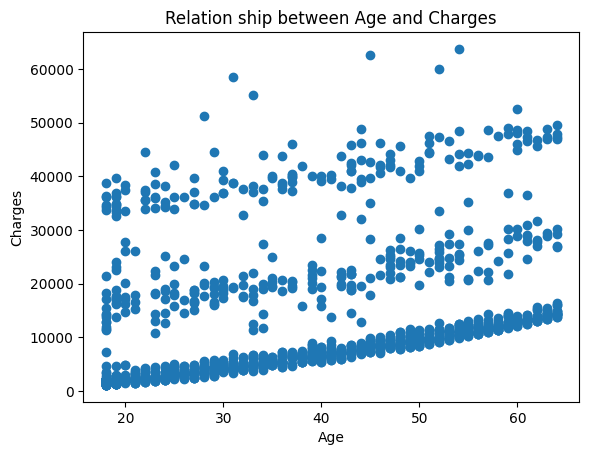

In [ ]:
# Age vs Charges
# the more the age the more will be insurance charge

plt.title("Relation ship between Age and Charges")

x = df['age']
y = df['charges']


plt.xlabel('Age')
plt.ylabel('Charges')

plt.scatter(x,y)

plt.show()



<ipython-input-9-2c466670f22f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


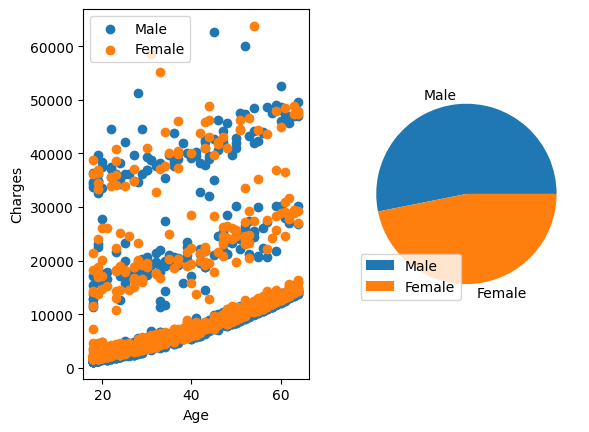

In [ ]:
# sex vs charges
# males insurance charges more than females.
plt.title('Relationship between sex and charges')

plt.subplot(1,2,1)

x1 = df['age'].loc[df['sex']=='male']
y1 = df['charges'].loc[df['sex']=='male']

x2 = df['age'].loc[df['sex']=='female']
y2 = df['charges'].loc[df['sex']=='female']


plt.xlabel('Age')
plt.ylabel('Charges')

plt.scatter(x1, y1, label="Male")
plt.scatter(x2, y2, label="Female")

plt.legend()


plt.subplot(1,2,2)
plt.pie([y1.sum(),y2.sum()],labels=["Male","Female"])

plt.legend()


plt.show()



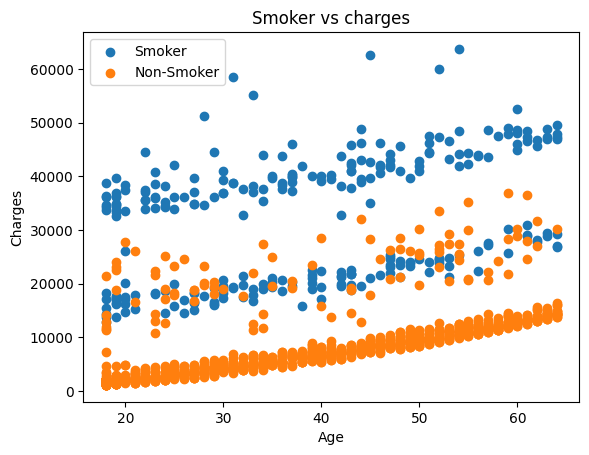

In [ ]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.title("Smoker vs charges")

x1 = df['age'].loc[df['smoker']=='yes']
y1 = df['charges'].loc[df['smoker']=='yes']

x2 = df['age'].loc[df['smoker']=='no']
y2 = df['charges'].loc[df['smoker']=='no']

plt.xlabel('Age')
plt.ylabel('Charges')

plt.scatter(x1, y1, label="Smoker")
plt.scatter(x2, y2, label="Non-Smoker")

plt.legend()

plt.show()

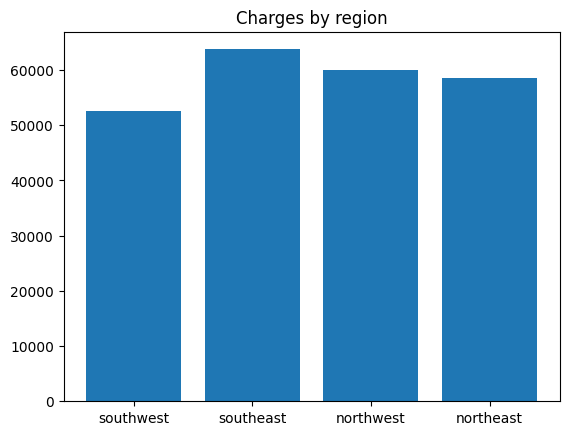

In [ ]:
# region vs charges
# region actually does not play any role in determining the insurance charges
plt.title('Charges by region')

x = df['region']
y = df['charges']

plt.bar(x,y)
plt.show()

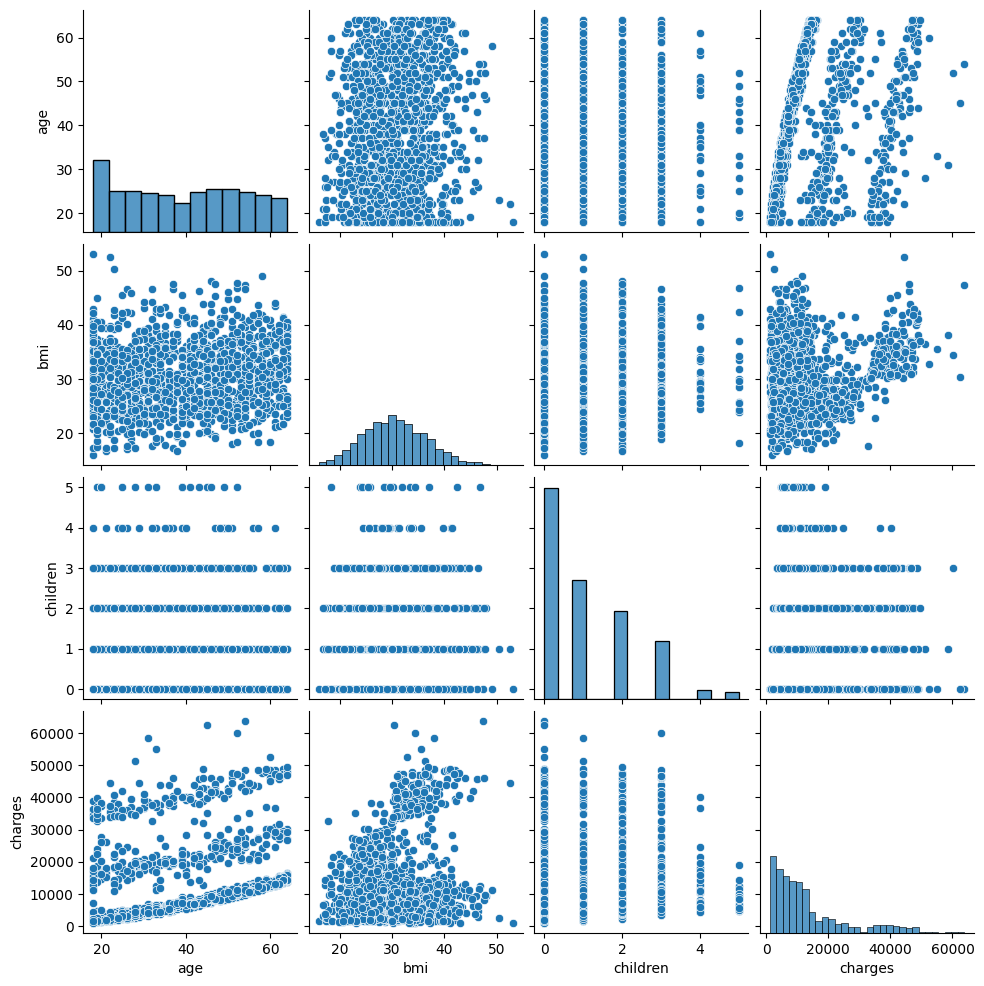

In [ ]:
# plotting the correlation plot for the dataset
sns.pairplot(df)
plt.show()

##STEP-3:Data Preprocessing / Clean the Data


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# removing unnecassary columns from the dataset
df.drop(columns = ['region'], inplace = True)

df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [ ]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
# Loop through columns and encode
for col in df.select_dtypes(include=['object']):
    # df.select_dtypes(include=['object']) will select all columns which the data type is a object, string is considered as a object here
    le = LabelEncoder()
    # This will replace the existing column with newly created encoded values
    df[col] = le.fit_transform(df[col])

# check whether the encoding is successful
df.head()



,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

Splitting the dataset into the Training set and Test set

In [ ]:
# Load the boiler plate class to split the dataset to train and test
from sklearn.model_selection import train_test_split

# split it
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=90)

##STEP-4 : Fit the Model & Predict , check the Accuracy

In [ ]:
model_scores = {}

##Linear Regression

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # Create the model instance

lr_model.fit(x_train,y_train) # Fit(/feed) the training dataset to the model

pred = lr_model.predict(x_test) # Predict the result for the testing dataset
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, pred, squared=True) # Default is squared = True,

# Root Mean Squared Error
rmse = mean_squared_error(y_test, pred, squared=False) # Default is squared = True,

# R2 score
r2 = r2_score(y_test, pred, )

model_scores["Linear Regression"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'r2 score: {r2}')


mse : 35141995.30413756
rmse : 5928.0684294412085
r2 score: 0.7620310719929533


##Support Vector Machine

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.svm import SVC, SVR

regr = SVR()

regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)


# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
r2 = r2_score(y_test,y_pred)

model_scores["Support Vector Machine"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'r2 score : {r2}')


mse : 35141995.30413756
rmse : 5928.0684294412085
r2 score : -0.09539835382564954


##Decision Tree

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor()

regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test,y_pred)

model_scores["Decision Tree"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'r2 score: {r2}')

mse: 52045343.545629375
rmse: 7214.245875046773
r2 score: 0.6475676891956763


##Random Forest

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()

regr.fit(x_test,y_test)

y_pred = regr.predict(x_test)

# Model evaluation
from sklearn.metrics import mean_squared_error, rand_score
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)
r2 = r2_score(y_test,y_pred)

model_scores["Random Forest"] = {"MSE": mse, "RMSE": rmse, "R2": r2}

print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'r2 : {r2}')


mse : 2927738.515921113
rmse : 1711.0635627939464
r2 : 0.9801744098452867


Compare and evaluate the Model results and find the best model

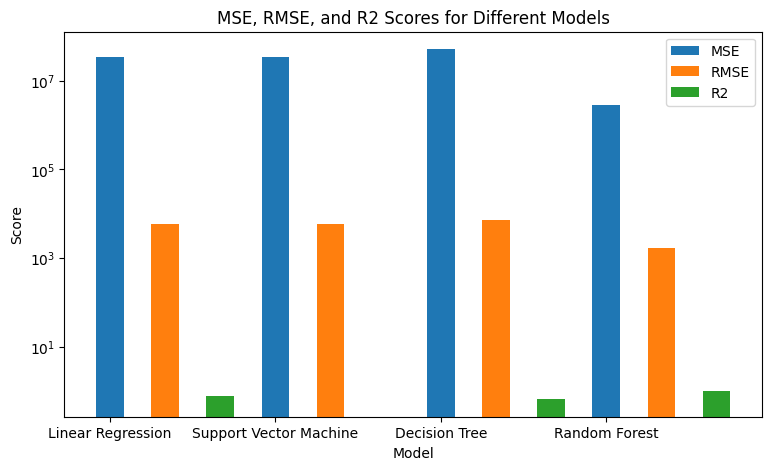

In [ ]:

import matplotlib.pyplot as plt

# Prepare data for clustered bar chart
metrics = ["MSE", "RMSE", "R2"]
models = list(model_scores.keys())
x = range(len(models) * len(metrics))  # Positions for each bar
width = 0.5  # Adjust bar width as needed

# Create clustered bar chart
plt.figure(figsize=(9, 5))  # Adjust figure size

for i, metric in enumerate(metrics):
    starts = [j * len(metrics) + i for j in range(len(models))]
    plt.bar(starts, [model_scores[model][metric] for model in models], width, label=metric)

plt.xticks(range(0, len(models) * len(metrics), len(metrics)), models)  # Set x-axis labels
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("MSE, RMSE, and R2 Scores for Different Models")
plt.legend()
plt.yscale("log")  # Set the y-axis to logarithmic scale
plt.show()
